<a href="https://colab.research.google.com/github/ram-1918/Data-Science/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sb

In [70]:
data = pd.read_csv('MLR_titanic.csv')

In [71]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [73]:
# data['Ticket'].apply(lambda x : x[0:3]).astype('category').cat.codes - generates numeric code for unique caregory in the column
# data['Survived'].ravel() - numpy array, pandas DF into flattened form
# data.drop(['Survived'], axis = 1).values # Converts directly into array
# women = data[data['Sex'] == 'female'].head(15) # similar to - women = data.loc[data.Sex == 'female']['Survived']
# data['Age'].isnull().sum()
# data.loc[cond, 'colName] = value # cond is similar to data['Age'] > 30
# data.groupby('Survived')['Pclass']
# data.groupby('Embarked').size() # return the group-wise count
# data['Embarked'].map([{'a':2.3423, 'b':3.435343}]).round(2)

In [74]:
# # Replacing null values with Mean
# age_mean = int(data['Age'].mean())
# data['Age'].fillna(age_mean, inplace=True)
# # Converting all values to Integers
# data['Age'] = data['Age'].astype('int16')
# print(f'Mean value of the Age is {age_mean}. Replaced null values with {age_mean}')

# A Different approach found in a Kaggle Notebook
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()
age_fill_range = np.random.randint(mean - std, mean + std, size=is_null)
age_fill_range
data.loc[data['Age'].isnull(), 'Age'] = age_fill_range # filter null values and replaced with randomly generated new values
data.Age.isnull().sum()
data.Age = data.Age.astype('int')

Text(0.5, 1.0, 'Male')

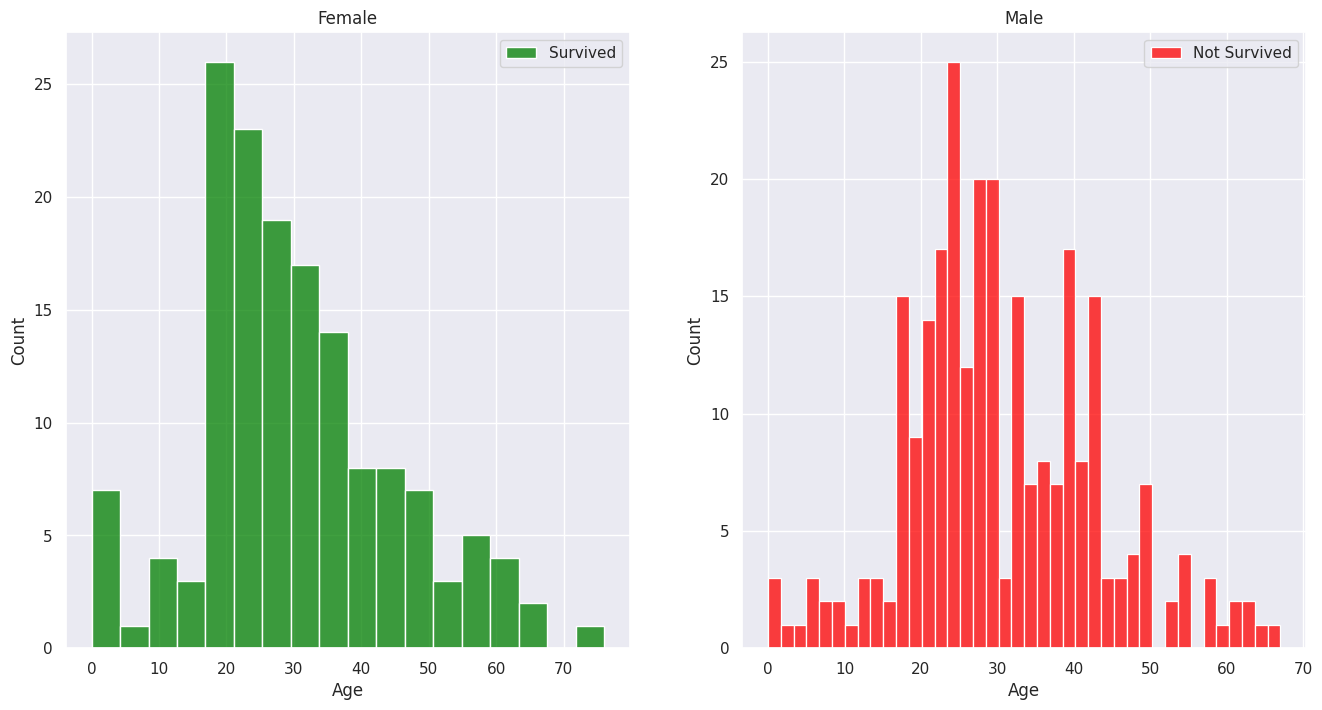

In [75]:
# Subplots for Gender vs Survived vs Age
survived = 'Survived'
not_survived = 'Not Survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
women = data[data['Sex'] == 'female']
men = data[data['Sex'] == 'male']
ax = sb.histplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False, color='green' ) # axes[0] is subplot location
ax = sb.histplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax = sb.histplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label=survived, kde=False, ax=axes[1], color='green')
ax = sb.histplot(men[men.Survived == 0].Age.dropna(), bins=40, label=not_survived, kde=False, ax=axes[1], color='red')
ax.legend()
ax.set_title('Male')

In [76]:
fig = px.scatter_3d(data, x="PassengerId", y="Age", z="Sex", color="Age", title='Gender & Age of all passengers').show()

In [77]:
for template in ['plotly']:
  fig = px.scatter(data, x='PassengerId', y='Age', color='Survived', size_max=20, template=template, title='which age survived?')
  fig.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

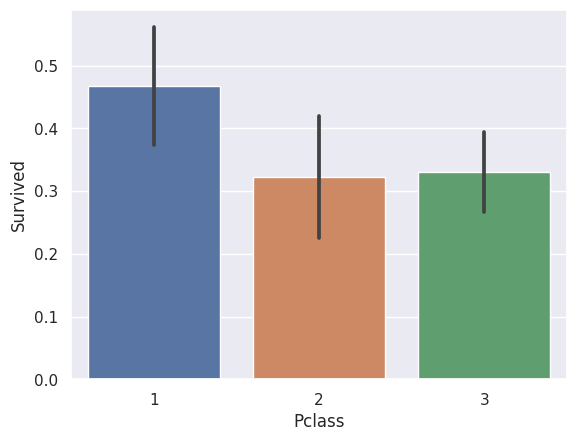

In [78]:
sb.barplot(x='Pclass', y='Survived', data=data)

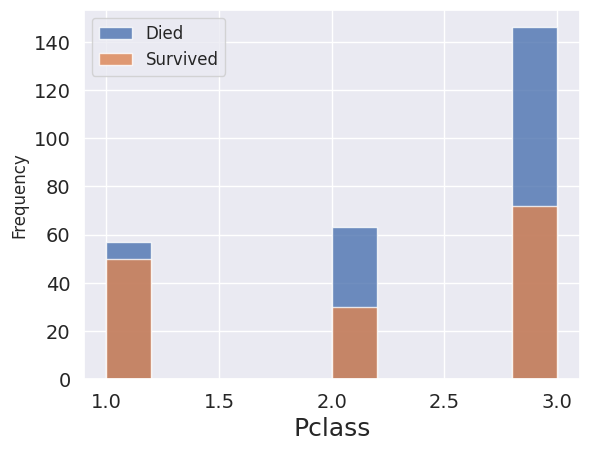

In [79]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure()

fig = data.groupby('Survived')['Pclass'].plot.hist(histtype='bar', alpha=0.8)
plt.legend(('Died', 'Survived'), fontsize=12)
plt.xlabel('Pclass', fontsize=18)
plt.show()

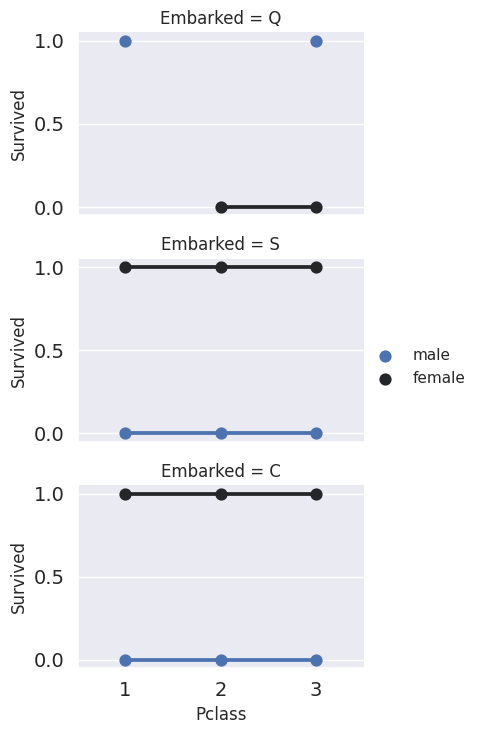

In [80]:
facet = sb.FacetGrid(data, row='Embarked', height=2.5, aspect=1.6)
facet.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
facet.add_legend();

<Axes: xlabel='Survived', ylabel='count'>

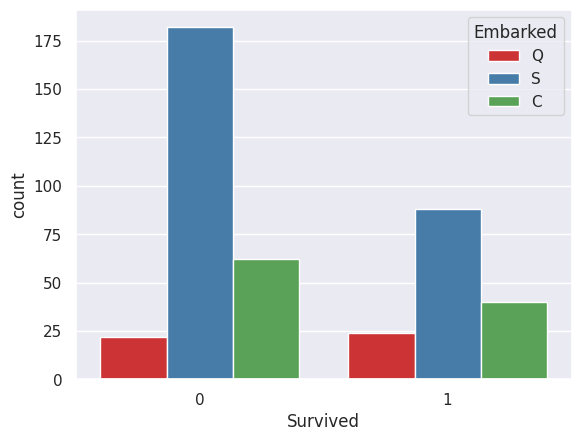

In [81]:
sb.set(style='darkgrid')
sb.countplot(x='Survived', hue='Embarked', data=data, palette='Set1')

<Axes: xlabel='Survived', ylabel='count'>

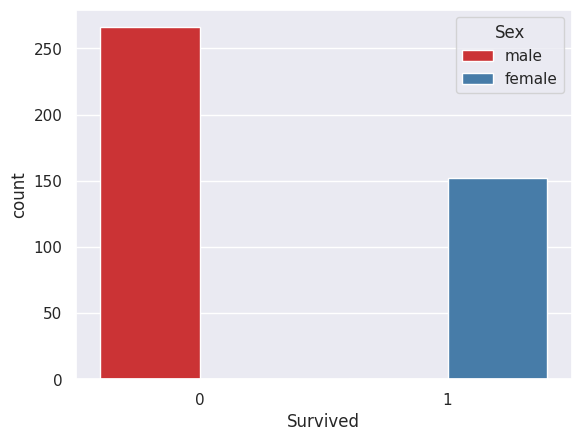

In [82]:
sb.set(style='darkgrid')
sb.countplot(x='Survived', hue='Sex', data=data, palette='Set1')

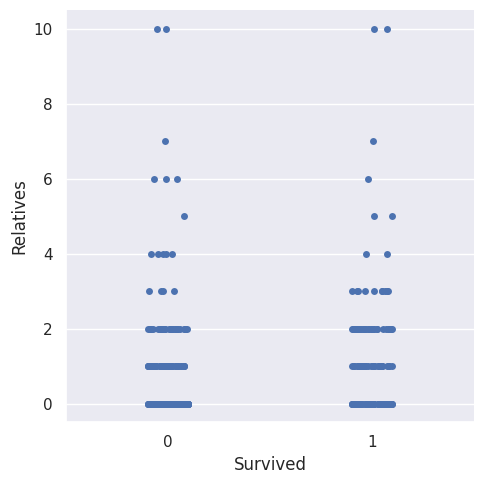

In [83]:
data['Relatives'] = data['SibSp'] + data['Parch']
data.loc[data['Relatives'] > 0, 'Travelled_alone'] = 'No'
data.loc[data['Relatives'] == 0, 'Travelled_alone'] = 'Yes'
data['Travelled_alone']
fig = sb.catplot(data=data, x='Survived', y='Relatives' )

In [84]:
fig = px.histogram(data, x='SibSp', y='Parch', color='Sex', marginal='rug', hover_data=data.columns, title='Shows the number of females and males who has number of siblings or spouse that is Parch.')
fig.show()

In [85]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Travelled_alone
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0,Yes
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,1,No
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0,Yes
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0,Yes
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,2,No


In [86]:
# Replaced null Fare value with mean value
fare_mean = data['Fare'].mean()
data['Fare'].fillna(fare_mean, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Survived         418 non-null    int64  
 2   Pclass           418 non-null    int64  
 3   Name             418 non-null    object 
 4   Sex              418 non-null    object 
 5   Age              418 non-null    int64  
 6   SibSp            418 non-null    int64  
 7   Parch            418 non-null    int64  
 8   Ticket           418 non-null    object 
 9   Fare             418 non-null    float64
 10  Cabin            91 non-null     object 
 11  Embarked         418 non-null    object 
 12  Relatives        418 non-null    int64  
 13  Travelled_alone  418 non-null    object 
dtypes: float64(1), int64(7), object(6)
memory usage: 45.8+ KB


In [87]:
data.drop(['Name','Cabin'], inplace=True, axis=1)

In [88]:
# Handling Categorical values (objects)
data['Sex'] = data['Sex'].replace('male', 1).replace('female', 0)

In [89]:
# set(data['Ticket'])
# data['Ticket'] = data['Ticket'].apply(lambda x : x.split(' ')[-1]).astype('int32')
data['Ticket'] = data['Ticket'].apply(lambda x : x[0:3])
data['Ticket'] = data['Ticket'].astype('category').cat.codes
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Travelled_alone
0,892,0,3,1,34,0,0,58,7.8292,Q,0,Yes
1,893,1,3,0,47,1,0,71,7.0000,S,1,No
2,894,0,2,1,62,0,0,32,9.6875,Q,0,Yes
3,895,0,3,1,27,0,0,55,8.6625,S,0,Yes
4,896,1,3,0,22,1,1,54,12.2875,S,2,No


In [90]:
# data['Embarked'] = data['Embarked'].replace('Q', 0).replace('S', 1).replace('C', 2)
# data.info()
c = data.groupby('Embarked').size()
c_ = c/len(data)
data['Embarked'] = data['Embarked'].map(c_).round(2)

In [91]:
c = data.groupby('Travelled_alone').size()
c_ = c/len(data)
data['Travelled_alone'] = data['Travelled_alone'].map(c_).round(2)
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Travelled_alone
0,892,0,3,1,34,0,0,58,7.8292,0.11,0,0.61
1,893,1,3,0,47,1,0,71,7.0000,0.65,1,0.39
2,894,0,2,1,62,0,0,32,9.6875,0.11,0,0.61
3,895,0,3,1,27,0,0,55,8.6625,0.65,0,0.61
4,896,1,3,0,22,1,1,54,12.2875,0.65,2,0.39
5,897,0,3,1,14,0,0,90,9.2250,0.65,0,0.61
6,898,1,3,0,30,0,0,58,7.6292,0.11,0,0.61
7,899,0,2,1,26,1,1,36,29.0000,0.65,2,0.39
8,900,1,3,0,18,0,0,41,7.2292,0.24,0,0.61
9,901,0,3,1,21,2,0,97,24.1500,0.65,2,0.39


In [92]:
y = data['Survived']
data = (data-data.mean())/data.std()
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

<Axes: >

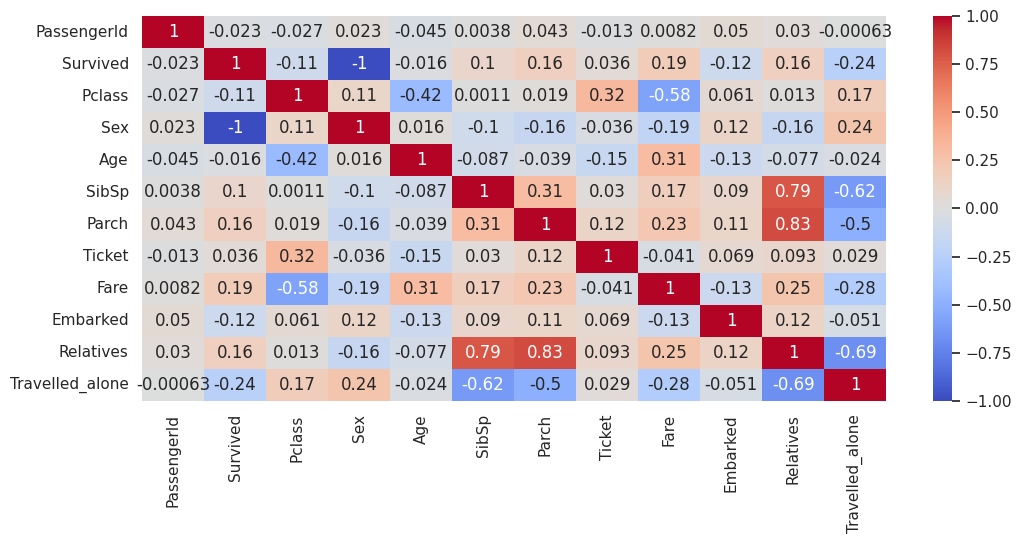

In [93]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,5))
sb.heatmap(corr, cmap='coolwarm', annot=True)

In [114]:
x = data.loc[:, ~data.columns.isin(['Survived'])] # Age, SibSp, Parch, Ticket, Fare, Relatives

In [115]:
from sklearn.model_selection import train_test_split
train_x, test_x , train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [116]:
# # Normalizing Train and Test
# train_x = (train_x - train_x.mean())/train_x.std()
# test_x = (test_x - test_x.mean())/test_x.std()

In [117]:
train_x.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Travelled_alone
336,1.055372,-0.315441,0.755024,0.126677,-0.498872,-0.399769,-0.796425,-0.405211,0.729476,-0.552780,0.806606
31,-1.469244,-0.315441,0.755024,-0.481081,1.731380,-0.399769,1.096851,-0.073910,0.729476,0.763813,-1.236796
84,-1.030540,-0.315441,0.755024,-0.860930,-0.498872,-0.399769,-0.881199,-0.446251,-1.740632,-0.552780,0.806606
287,0.649778,-1.503319,0.755024,-0.481081,0.616254,-0.399769,-1.192036,0.835227,0.729476,0.105516,-1.236796
317,0.898101,-0.315441,0.755024,-0.860930,-0.498872,-0.399769,-0.485589,-0.449981,0.729476,-0.552780,0.806606
211,0.020694,0.872436,0.755024,0.810405,-0.498872,-0.399769,1.407688,-0.511765,0.729476,-0.552780,0.806606
94,-0.947766,-1.503319,0.755024,-0.405111,-0.498872,-0.399769,-1.446356,-0.172405,-1.145976,-0.552780,0.806606
389,1.494076,0.872436,0.755024,-1.848537,2.846506,0.619154,0.136084,-0.260603,0.729476,2.080406,-1.236796
327,0.980875,-1.503319,0.755024,1.190253,-0.498872,-0.399769,1.238140,0.780308,-1.145976,-0.552780,0.806606
5,-1.684457,0.872436,0.755024,-1.240779,-0.498872,-0.399769,0.757757,-0.472814,0.729476,-0.552780,0.806606


In [118]:
train_x = train_x[['Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Relatives']] # train_X[['Fare', 'SibSp', 'Parch', 'Embarked']] # Positive Correlations
test_x = test_x[['Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Relatives']] # train_X[['Fare', 'SibSp', 'Parch', 'Embarked']] # Positive Correlations
train_y = train_y

In [119]:
n, d = train_x.shape
w = np.array([np.random.uniform(0,1) for _ in range(d)]) # np.zeros(d)
# b = np.random.uniform(0,1)

In [120]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

alpha = 0.001
costs = []
for _ in range(1000):
  h = sigmoid(np.dot(train_x, w))
  error = train_y - h
  gradient = (2/n) * np.dot(train_x.T, error)
  w -= alpha * gradient
  cost = (1/n) * np.sum(-train_y*np.log(h) - (1 - train_y)*np.log(1 - h)) # (1/n) * np.sum(error**2)
  costs.append(cost)
print(w)

[0.2195034  0.7010384  1.07074406 0.94444233 0.81432132 1.30059743]


In [123]:
pred_y = sigmoid(np.dot(test_x, w))
pred_y = np.round(pred_y)
accuracy = np.mean(pred_y == test_y)
print("Accuracy: ", accuracy*100)
print("Total Cost", np.array(costs).mean())

Accuracy:  70.23809523809523
Total Cost 0.9802136316508974


1. With 'Fare', 'Sib', 'Parch', 'Embarked' and weights radomized - 67%
2. With 'Fare', 'Sib', 'Parch' and weights radomized - 63%
3. With 'Fare', 'Sib', 'Parch' and weights radomized and intercept - 60 - 63%
4. With 'Age','Fare' and weights all zeros - 57%

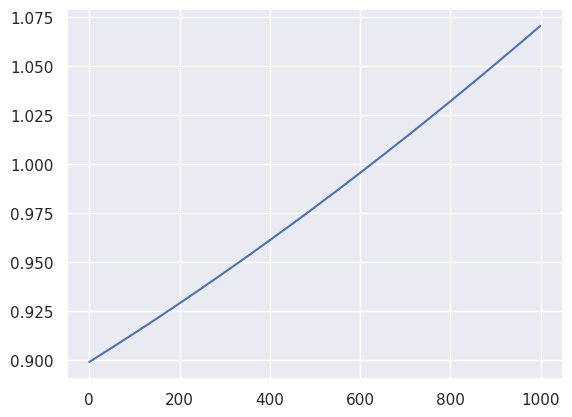

In [126]:
plt.plot(range(len(costs)), costs)

Relationships and Analysis
1. Exploratory Data Analysis
  1.
2. Group Analysis

In [127]:
train_x.columns

Index(['Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Relatives'], dtype='object')

In [129]:
survived = train_y
age = train_x['Age']
siblings = train_x['SibSp']
parch = train_x['Parch']
ticket = train_x['Ticket']
fare = train_x['Fare']
relatives = train_x['Relatives']

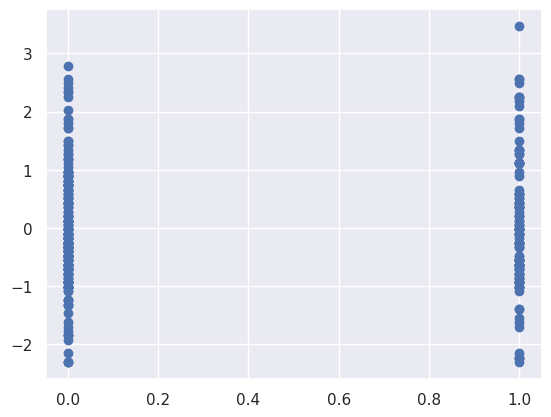

In [130]:
plt.scatter(survived, age)